## Welfare Range Calculations

### Set-Up

In [81]:
import squigglepy as sq
from squigglepy.numbers import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
import platform

# total neuron count, EQ, packing density
neuron_count_aggregation_weights = [0.2, 0.4, 0.4]

# qualitative, equality, neuron count
model_weights = [0.6, 0.1, 0.3]
N = 40*K
PERCENTILES = [1, 5, 25, 50, 75, 95, 99]
ANIMALS = ["Pigs", "Chickens", "Carp", "Octopuses", "Shrimp", "BSF"]

### Import Data

In [82]:
pig_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('simulations', "Pigs")), 'rb'))
chicken_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('simulations', "Chickens")), 'rb'))
carp_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('simulations', "Carp")), 'rb'))
octopus_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('simulations', "Octopuses")), 'rb'))
shrimp_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('simulations', "Shrimp")), 'rb'))
bsf_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('simulations', "BSF")), 'rb'))

unknown_probabilities = pickle.load(open(os.path.join('inputs', "Unknown Probabilities.p"), 'rb'))

data = {'Pigs': {'Scores': pig_scores, 'Unknown Prob': unknown_probabilities['Pigs']}, 
        'Chickens': {'Scores': chicken_scores, 'Unknown Prob': unknown_probabilities['Chickens']}, 
        'Carp': {'Scores': carp_scores,  'Unknown Prob': unknown_probabilities['Carp']}, 
        'Octopuses': {'Scores': octopus_scores,  'Unknown Prob': unknown_probabilities['Octopuses']}, 
        'Shrimp': {'Scores': shrimp_scores, 'Unknown Prob': unknown_probabilities['Shrimp']}, 
        'BSF': {'Scores': bsf_scores, 'Unknown Prob': unknown_probabilities['BSF']}}

#print(test_simulations.test_wr_scores(data, overlap_dict, HC_WEIGHT, SENT_HC_WEIGHT, SPECIES))

def run_cmd(cmd):
    print(cmd)
    os.system(cmd)

if platform.system() == 'Darwin' or platform.system() == 'Linux':
    run_cmd('rm -rf outputs')
    run_cmd('mkdir outputs')
    run_cmd('rm -rf images')
    run_cmd('mkdir images')
    run_cmd('rm -rf pickled_sent_conditioned_welfare_ranges')
    run_cmd('mkdir pickled_sent_conditioned_welfare_ranges')
    run_cmd('rm -rf pickled_sent_adjusted_welfare_ranges')
    run_cmd('mkdir pickled_sent_adjusted_welfare_ranges')
elif platform.system() == 'Windows':
    run_cmd('rmdir /Q /S outputs')
    run_cmd('mkdir outputs')
    run_cmd('rmdir /Q /S images')
    run_cmd('mkdir images')
    run_cmd('rmdir /Q /S pickled_sent_conditioned_welfare_ranges')
    run_cmd('mkdir pickled_sent_conditioned_welfare_ranges')
    run_cmd('rmdir /Q /S pickled_sent_adjusted_welfare_ranges')
    run_cmd('mkdir pickled_sent_adjusted_welfare_ranges')
else:
    raise ValueError('Platform `{}` not supported'.format(platform.system()))

rmdir /Q /S outputs
mkdir outputs
rmdir /Q /S images
mkdir images
rmdir /Q /S pickled_sent_conditioned_welfare_ranges
mkdir pickled_sent_conditioned_welfare_ranges
rmdir /Q /S pickled_sent_adjusted_welfare_ranges
mkdir pickled_sent_adjusted_welfare_ranges


### P(Sentience) Distributions

#### Distribution Sampling

In [83]:
pigs_psent = np.ones(N) - sq.sample(sq.lognorm(0.001, 0.2, rclip=.4), N)
chickens_psent = np.ones(N) - sq.sample(sq.lognorm(0.05, 0.25, lclip=0.01, rclip=0.5), N)
carp_psent = sq.sample(sq.norm(0.55, 0.85, lclip=0, rclip=1), N)
octopuses_psent = np.ones(N) - sq.sample(sq.lognorm(0.1, 0.5, lclip=0.01, rclip=.99), N)
shrimp_psent = sq.sample(sq.lognorm(0.2, 0.7, lclip = 0.01, rclip=1), N)
bsf_psent = sq.sample(sq.norm(0.1, 0.6, lclip = 0.01, rclip=1), N)

sent_models_dict = {"Pigs": pigs_psent, "Chickens": chickens_psent, "Carp": carp_psent, "Octopuses": octopuses_psent, "Shrimp": shrimp_psent, "BSF": bsf_psent}

#### P(Sentience) Summary Statistics

In [84]:
def get_percentiles_table(models_dict, animals):
    cols = ['1%', '5%', '25%', '50%', '75%', '95%', '99%', "Mean"]
    percentiles_dict = {}
    for animal in animals:
        percentiles = np.round(np.percentile(models_dict[animal], PERCENTILES), 2)
        percent_and_mean = np.append(percentiles, np.round(np.mean(models_dict[animal]),2))
        percentiles_dict[animal] = percent_and_mean
    df = pd.DataFrame.from_dict(percentiles_dict, columns=cols, orient='index')
    print("Probability of Sentience")
    df.to_csv(os.path.join("outputs", "P_sentience_percentiles.csv"))
    return df

get_percentiles_table(sent_models_dict, ANIMALS)

Probability of Sentience


,1%,5%,25%,50%,75%,95%,99%,Mean
Pigs,0.60,0.80,0.96,0.99,1.00,1.00,1.00,0.96
Chickens,0.65,0.75,0.84,0.89,0.92,0.95,0.96,0.87
Carp,0.49,0.55,0.64,0.70,0.76,0.85,0.92,0.70
Octopuses,0.30,0.50,0.69,0.78,0.84,0.90,0.93,0.75
Shrimp,0.15,0.20,0.29,0.37,0.48,0.70,0.90,0.40
BSF,0.01,0.10,0.25,0.35,0.45,0.60,0.70,0.35


### Sentience-Conditioned Welfare Ranges

#### Qualitative Proxies Model

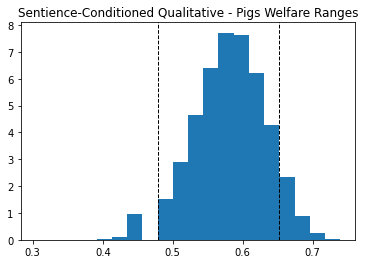

-


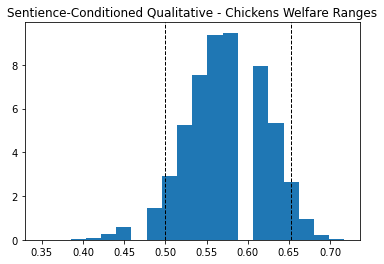

-


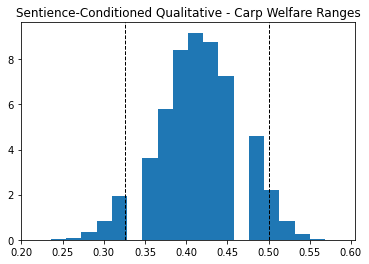

-


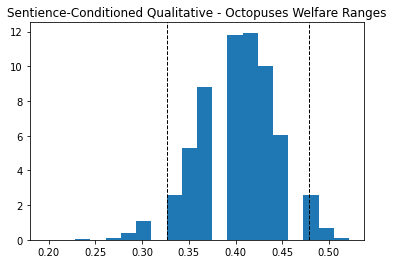

-


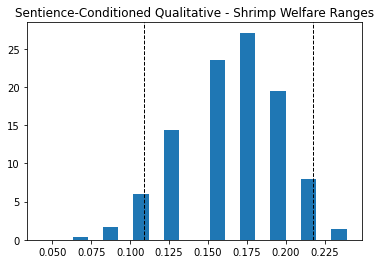

-


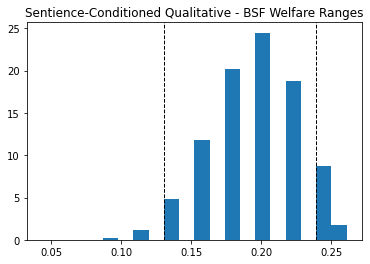

-
     Animals   Mean     5%    25%    50%    75%    95%
0       Pigs  0.571  0.478  0.543  0.565  0.609  0.652
1   Chickens  0.573  0.500  0.543  0.565  0.609  0.652
2       Carp  0.416  0.326  0.391  0.413  0.457  0.500
3  Octopuses  0.402  0.326  0.370  0.413  0.435  0.478
4     Shrimp  0.166  0.109  0.152  0.174  0.196  0.217
5        BSF  0.190  0.130  0.174  0.196  0.217  0.239


In [85]:
def get_human_sum(model_proxies_lst):
    human_sum = len(model_proxies_lst)
    return human_sum

def one_sim_animal_wr(animal_scores, sim, human_sum):
    welfare_sum = 0
    for scores_list in animal_scores.values():
        score_i = scores_list[sim]
        welfare_sum += score_i

    welfare_range = welfare_sum/human_sum

    return welfare_range

def one_animal_welfare_ranges(animal_scores, model_proxies_lst):
    human_sum = get_human_sum(model_proxies_lst)
    animal_welfare_ranges = []
    for sim in range(N):
        animal_welfare_range_i = one_sim_animal_wr(animal_scores, sim, human_sum)
        animal_welfare_ranges.append(animal_welfare_range_i)
    return animal_welfare_ranges

def plot_range_distribution(species, welfare_range_list, model):
    welfare_range_array = np.array(welfare_range_list)
    plt.hist(welfare_range_array, bins=20, density=True)
    plt.axvline(x=np.percentile(welfare_range_array, PERCENTILES)[1], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(x=np.percentile(welfare_range_array, PERCENTILES)[5], color='k', linestyle='dashed', linewidth=1)
    plt.title("{} - {} Welfare Ranges".format(model, species))
    plt.savefig(os.path.join("images", "{}_{}_welfare_range_distribution.jpeg".format(species, model)))
    plt.show()
    print('-')

def one_animal_summary_stats(species, welfare_range_list, to_print=False):
    welfare_range_array = np.array(welfare_range_list)
    percentiles = np.percentile(welfare_range_array, PERCENTILES)
    mean = np.mean(welfare_range_array)
    fifth_percentile = percentiles[1]
    twenty_fifth_percentile = percentiles[2]
    seventy_fifth_percentile = percentiles[4]
    ninty_fifth_percentile = percentiles[5]
    median = percentiles[3]
    stats_tuple = (mean, fifth_percentile, twenty_fifth_percentile, median, seventy_fifth_percentile, ninty_fifth_percentile)
    if to_print:
        print("Number samples: {}".format(len(welfare_range_array)))
        print("Mean welfare range: {}".format(mean))
        print("5th-percentile welfare range: {}".format(fifth_percentile))
        print("25th-percentile welfare range: {}".format(twenty_fifth_percentile))
        print("50th-percentile welfare range: {}".format(median))
        print("75th-percentile welfare range: {}".format(seventy_fifth_percentile))
        print("95th-percentile welfare range: {}".format(ninty_fifth_percentile))
    return stats_tuple

def get_qualitative_welfare_ranges(data, ANIMALS, to_plot=True):
    model_proxies_lst = data['Pigs']['Scores'].keys()
    means = []
    fifth_percentiles = []
    twenty_fifth_percentiles = []
    medians = []
    seventy_fifth_percentiles = []
    ninty_fifth_percentiles = []

    welfare_ranges_all_animals = {}

    for animal in ANIMALS:
        animal_scores = data[animal]['Scores']
        animal_welfare_ranges = one_animal_welfare_ranges(animal_scores, model_proxies_lst)
        welfare_ranges_all_animals[animal] = animal_welfare_ranges
        pickle.dump(np.array(animal_welfare_ranges), open(os.path.join('pickled_sent_conditioned_welfare_ranges', '{}_qual_model_welfare_ranges.p'.format(animal)), 'wb'))
        if to_plot:
            plot_range_distribution(animal, animal_welfare_ranges, "Sentience-Conditioned Qualitative")
        animal_stats = one_animal_summary_stats(animal, animal_welfare_ranges)
        means.append(round(animal_stats[0],3))
        fifth_percentiles.append(round(animal_stats[1],3))
        twenty_fifth_percentiles.append(round(animal_stats[2],3))
        medians.append(round(animal_stats[3],3))
        seventy_fifth_percentiles.append(round(animal_stats[4],3))
        ninty_fifth_percentiles.append(round(animal_stats[5],3))

    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    welfare_range_stats_df = pd.DataFrame(list(zip(ANIMALS, means, fifth_percentiles, twenty_fifth_percentiles, medians, seventy_fifth_percentiles, ninty_fifth_percentiles)), columns=cols)
    welfare_range_stats_df.sort_values("50%", ascending=False)
    welfare_range_stats_df.to_csv(os.path.join("outputs", "Qualitative Model - Sentience-Conditioned Welfare Ranges.csv"))
    return welfare_range_stats_df, welfare_ranges_all_animals

qualitative_welfare_range_stats_df, qualitative_welfare_ranges_all_animals = get_qualitative_welfare_ranges(data, ANIMALS, to_plot=True)
print(qualitative_welfare_range_stats_df)




### Equality-Among-Sentient-Animals Model

In [86]:
def get_equality_welfare_ranges():
    equality_welfare_ranges = {}
    for animal in ANIMALS:
        equality_welfare_ranges[animal] = 1
    return equality_welfare_ranges

### Neuron Count Model

In [87]:
def get_geometric_mean_of_row(df, animal, weights):
    animal_proxy_lst = df.loc[df['Animals'] == animal].values.tolist()[0][1:4]
    animal_geom_mean = np.exp(np.log(animal_proxy_lst).dot(weights))
    return animal_geom_mean

def get_neuron_count_welfare_ranges(neuron_count_aggregation_weights):
    neuron_count_df = pd.read_csv(os.path.join('inputs', 'Neuron Count Data.csv'))
    human_geom_mean = get_geometric_mean_of_row(neuron_count_df, 'Humans', neuron_count_aggregation_weights)

    nc_welfare_ranges_dict = {}
    for animal in ANIMALS:
        animal_geom_mean = get_geometric_mean_of_row(neuron_count_df, animal, neuron_count_aggregation_weights)
        welfare_range = animal_geom_mean/human_geom_mean
        nc_welfare_ranges_dict[animal] = welfare_range

    neuron_count_df = pd.DataFrame.from_dict(nc_welfare_ranges_dict, orient='index', columns=['Aggregate Neuron Count Score'])
    neuron_count_df.to_csv(os.path.join('outputs', 'Neuron Count Model - Sentience-Conditioned Welfare Ranges.csv'))
    return nc_welfare_ranges_dict

get_neuron_count_welfare_ranges(neuron_count_aggregation_weights)


{'Pigs': 0.05864316833208694,
 'Chickens': 0.03633033425670495,
 'Carp': 0.0008432910418629421,
 'Octopuses': 0.04229844634366704,
 'Shrimp': 0.0008612420578225753,
 'BSF': 0.0005421933380387801}

### Sentience-Confitioned Welfare Ranges

#### Mixture Model Method

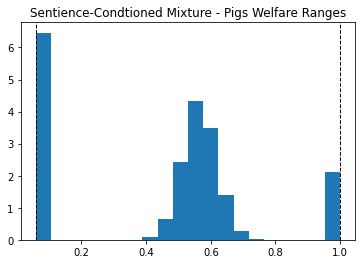

-


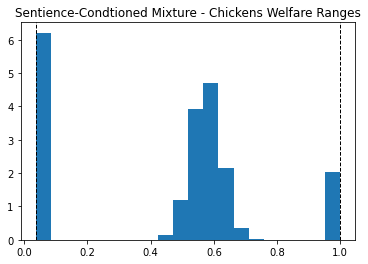

-


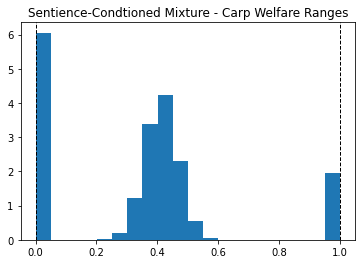

-


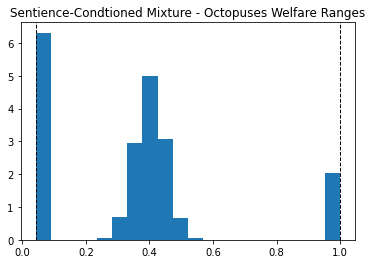

-


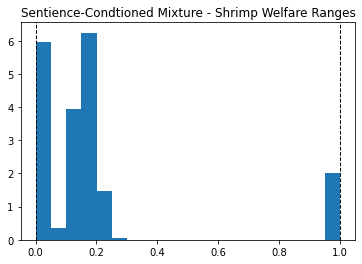

-


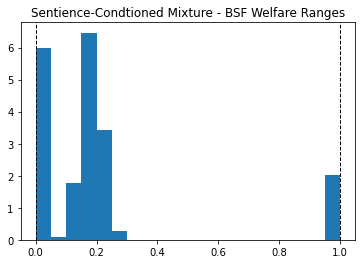

-
     Animals   Mean     5%    25%    50%    75%  95%
0       Pigs  0.454  0.059  0.059  0.541  0.600  1.0
1   Chickens  0.456  0.036  0.036  0.555  0.607  1.0
2       Carp  0.346  0.001  0.001  0.390  0.449  1.0
3  Octopuses  0.352  0.042  0.042  0.382  0.433  1.0
4     Shrimp  0.199  0.001  0.001  0.149  0.185  1.0
5        BSF  0.211  0.001  0.001  0.170  0.207  1.0


In [88]:
def get_model_results():
    qualitative_welfare_ranges_df, qualitative_welfare_ranges_dict = get_qualitative_welfare_ranges(data, ANIMALS, to_plot=False)
    equality_welfare_ranges = get_equality_welfare_ranges()
    neuron_count_welfare_ranges = get_neuron_count_welfare_ranges(neuron_count_aggregation_weights)
    model_results = {'Qualitative': (qualitative_welfare_ranges_df, qualitative_welfare_ranges_dict), 
                     'Equality': equality_welfare_ranges, 
                     'Neuron Count': neuron_count_welfare_ranges}
        
    
    return model_results

def mixture_one_animal(model_results, animal, weights):
    qual_model_df = model_results['Qualitative'][0]
    equality_results = model_results['Equality'][animal]
    neuron_count_results = model_results['Neuron Count'][animal]

    animal_qualitative_row = qual_model_df.loc[qual_model_df['Animals'] == animal].values.tolist()[0]
    animal_fifth_pct = animal_qualitative_row[2]
    animal_ninty_fifth_pct = animal_qualitative_row[6]

    qual_model = sq.norm(animal_fifth_pct, animal_ninty_fifth_pct, lclip=0)
    equality_model = sq.uniform(equality_results, equality_results)
    neuron_count_model = sq.uniform(neuron_count_results, neuron_count_results)

    mixture_model = sq.mixture([qual_model, equality_model, neuron_count_model], weights)

    mixture_welfare_ranges = sq.sample(mixture_model, N)

    return mixture_welfare_ranges

def get_mixture_welfare_ranges(weights, to_plot=True):
    means = []
    fifth_percentiles = []
    twenty_fifth_percentiles = []
    medians = []
    seventy_fifth_percentiles = []
    ninty_fifth_percentiles = []

    model_results = get_model_results()

    mixture_welfare_range_results = {}
    
    for animal in ANIMALS:
        animal_mixture_wr_lst = mixture_one_animal(model_results, animal, weights)
        mixture_welfare_range_results[animal] = animal_mixture_wr_lst
        animal_stats = one_animal_summary_stats(animal, animal_mixture_wr_lst, to_print=False)
        pickle.dump(np.array(animal_mixture_wr_lst), open(os.path.join('pickled_sent_conditioned_welfare_ranges', '{}_mixture_model_welfare_ranges.p'.format(animal)), 'wb'))
        means.append(round(animal_stats[0],3))
        fifth_percentiles.append(round(animal_stats[1],3))
        twenty_fifth_percentiles.append(round(animal_stats[2],3))
        medians.append(round(animal_stats[3],3))
        seventy_fifth_percentiles.append(round(animal_stats[4],3))
        ninty_fifth_percentiles.append(round(animal_stats[5],3))
    
    if to_plot:
        for animal in ANIMALS:
            plot_range_distribution(animal, mixture_welfare_range_results[animal], "Sentience-Condtioned Mixture")
    
    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    mixture_welfare_range_stats_df = pd.DataFrame(list(zip(ANIMALS, means, fifth_percentiles, twenty_fifth_percentiles, medians, seventy_fifth_percentiles, ninty_fifth_percentiles)), columns=cols)
    mixture_welfare_range_stats_df.sort_values("50%", ascending=False)
    mixture_welfare_range_stats_df.to_csv(os.path.join("outputs", "Mixture Model - Sentience-Conditioned Welfare Ranges.csv"))
    return mixture_welfare_range_stats_df, mixture_welfare_range_results

print(get_mixture_welfare_ranges(model_weights)[0])



#### Geometric Mean Method

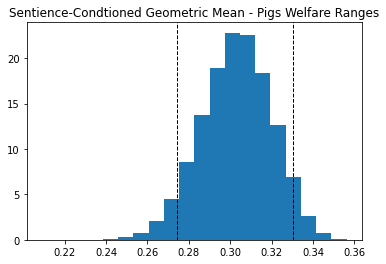

-


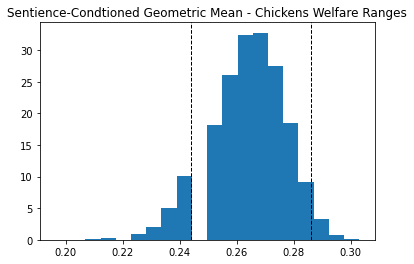

-


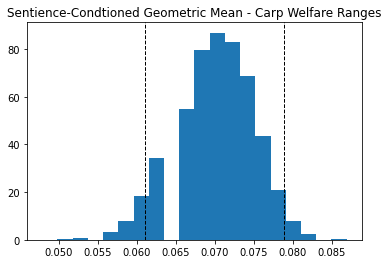

-


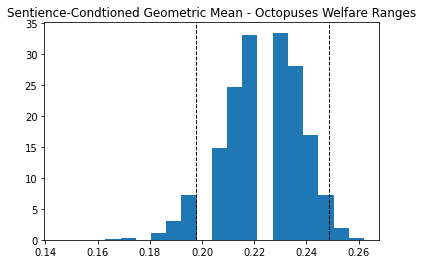

-


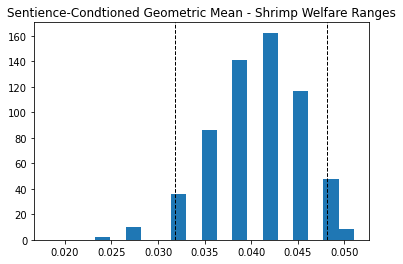

-


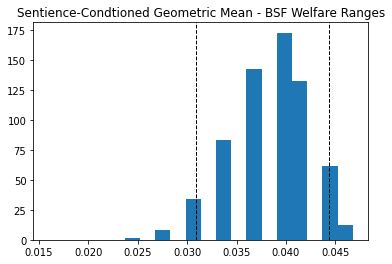

-
     Animals   Mean     5%    25%    50%    75%    95%
0       Pigs  0.305  0.274  0.296  0.303  0.317  0.330
1   Chickens  0.265  0.244  0.257  0.263  0.275  0.286
2       Carp  0.071  0.061  0.068  0.070  0.075  0.079
3  Octopuses  0.224  0.198  0.213  0.228  0.235  0.249
4     Shrimp  0.041  0.032  0.039  0.042  0.045  0.048
5        BSF  0.039  0.031  0.037  0.039  0.042  0.044


In [89]:
def geometric_mean_welfare_ranges(model_weights, to_plot=False):
    means = []
    fifth_percentiles = []
    twenty_fifth_percentiles = []
    medians = []
    seventy_fifth_percentiles = []
    ninty_fifth_percentiles = []

    model_results = get_model_results()
    qual_wr_lst = model_results['Qualitative'][1]
    equality_wr_lst = model_results['Equality']
    neuron_count_wr_lst = model_results['Neuron Count']

    q_wt = model_weights[0]
    e_wt = model_weights[1]
    nc_wt = model_weights[2]

    geom_mean_welfare_ranges = {}

    for animal in ANIMALS: 
        animal_qualitative_welfare_ranges = qual_wr_lst[animal]
        animal_equality_welfare_range = equality_wr_lst[animal]
        animal_neuron_count_welfare_range = neuron_count_wr_lst[animal]

        animal_geom_mean_welfare_range = []

        for i in range(N):
            animal_welfare_range_i = (animal_qualitative_welfare_ranges[i])**(q_wt*animal_equality_welfare_range**e_wt)*(animal_neuron_count_welfare_range**nc_wt)
            animal_geom_mean_welfare_range.append(animal_welfare_range_i)
        pickle.dump(np.array(animal_geom_mean_welfare_range), open(os.path.join('pickled_sent_conditioned_welfare_ranges', '{}_geom_mean_welfare_ranges.p'.format(animal)), 'wb'))
        geom_mean_welfare_ranges[animal] = animal_geom_mean_welfare_range
        animal_stats = one_animal_summary_stats(animal, animal_geom_mean_welfare_range, to_print=False)
        means.append(round(animal_stats[0],3))
        fifth_percentiles.append(round(animal_stats[1],3))
        twenty_fifth_percentiles.append(round(animal_stats[2],3))
        medians.append(round(animal_stats[3],3))
        seventy_fifth_percentiles.append(round(animal_stats[4],3))
        ninty_fifth_percentiles.append(round(animal_stats[5],3))

    if to_plot:
        for animal in ANIMALS:
            plot_range_distribution(animal, geom_mean_welfare_ranges[animal], "Sentience-Condtioned Geometric Mean")

    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    geom_mean_welfare_range_stats_df = pd.DataFrame(list(zip(ANIMALS, means, fifth_percentiles, twenty_fifth_percentiles, medians, seventy_fifth_percentiles, ninty_fifth_percentiles)), columns=cols)
    geom_mean_welfare_range_stats_df.sort_values("50%", ascending=False)
    geom_mean_welfare_range_stats_df.to_csv(os.path.join("outputs", "Geometric Mean Model - Sentience-Conditioned Welfare Ranges.csv"))
    return geom_mean_welfare_range_stats_df, geom_mean_welfare_ranges
    
    
geom_mean_welfare_range_stats_df, geom_mean_welfare_ranges = geometric_mean_welfare_ranges(model_weights, to_plot=True)
print(geom_mean_welfare_range_stats_df)

## P(Sentience)-Adjusted Welfare Ranges

### Neuron Count and Equality Model P(Sentience) Adjustments

#### Code

In [90]:
def neuron_count_and_equality_summary_stats():
    equality_ranges = get_equality_welfare_ranges()
    neuron_count_ranges = get_neuron_count_welfare_ranges(neuron_count_aggregation_weights)

    equality_means = []
    equality_fifth_percentiles = []
    equality_twenty_fifth_percentiles = []
    equality_medians = []
    equality_seventy_fifth_percentiles = []
    equality_ninty_fifth_percentiles = []

    neuron_count_means = []
    neuron_count_fifth_percentiles = []
    neuron_count_twenty_fifth_percentiles = []
    neuron_count_medians = []
    neuron_count_seventy_fifth_percentiles = []
    neuron_count_ninty_fifth_percentiles = []
    
    for animal in ANIMALS:
        animal_psent = sent_models_dict[animal]
        animal_equality_range = equality_ranges[animal]*animal_psent
        animal_neuron_count_range = neuron_count_ranges[animal]*animal_psent

        equality_stats_tuple = one_animal_summary_stats(animal, animal_equality_range, to_print=False)
        neuron_count_stats_tuple = one_animal_summary_stats(animal, animal_neuron_count_range, to_print=False)

        equality_means.append(round(equality_stats_tuple[0],3))
        equality_fifth_percentiles.append(round(equality_stats_tuple[1],3))
        equality_twenty_fifth_percentiles.append(round(equality_stats_tuple[2],3))
        equality_medians.append(round(equality_stats_tuple[3],3))
        equality_seventy_fifth_percentiles.append(round(equality_stats_tuple[4],3))
        equality_ninty_fifth_percentiles.append(round(equality_stats_tuple[5],3))

        neuron_count_means.append(round(neuron_count_stats_tuple[0],5))
        neuron_count_fifth_percentiles.append(round(neuron_count_stats_tuple[1],6))
        neuron_count_twenty_fifth_percentiles.append(round(neuron_count_stats_tuple[2],5))
        neuron_count_medians.append(round(neuron_count_stats_tuple[3],5))
        neuron_count_seventy_fifth_percentiles.append(round(neuron_count_stats_tuple[4],5))
        neuron_count_ninty_fifth_percentiles.append(round(neuron_count_stats_tuple[5],5))

    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    equality_stats_df = pd.DataFrame(list(zip(ANIMALS, equality_means, equality_fifth_percentiles, equality_twenty_fifth_percentiles, equality_medians, equality_seventy_fifth_percentiles, equality_ninty_fifth_percentiles)), columns=cols)
    equality_stats_df.sort_values("50%", ascending=False)
    equality_stats_df.to_csv(os.path.join("outputs", "Equality Model - Sentience-Adjusted Welfare Ranges.csv"))

    neuron_count_stats_df = pd.DataFrame(list(zip(ANIMALS, neuron_count_means, neuron_count_fifth_percentiles, neuron_count_twenty_fifth_percentiles, neuron_count_medians, neuron_count_seventy_fifth_percentiles, neuron_count_ninty_fifth_percentiles)), columns=cols)
    neuron_count_stats_df.sort_values("50%", ascending=False)
    neuron_count_stats_df.to_csv(os.path.join("outputs", "Neuron Count Model - Sentience-Adjusted Welfare Ranges.csv"))
    
    return equality_stats_df, neuron_count_stats_df

#### Neuron Count Model Welfare Ranges Adjusted for Sentience

In [91]:
print(neuron_count_and_equality_summary_stats()[1])

     Animals     Mean        5%      25%      50%      75%      95%
0       Pigs  0.05615  0.047059  0.05619  0.05782  0.05836  0.05858
1   Chickens  0.03176  0.027228  0.03068  0.03226  0.03341  0.03452
2       Carp  0.00059  0.000464  0.00054  0.00059  0.00064  0.00072
3  Octopuses  0.03165  0.021236  0.02915  0.03281  0.03548  0.03805
4     Shrimp  0.00034  0.000172  0.00025  0.00032  0.00041  0.00060
5        BSF  0.00019  0.000055  0.00013  0.00019  0.00025  0.00032


#### Equality Model Welfare Ranges Adjusted for Sentience

In [92]:
print(neuron_count_and_equality_summary_stats()[0])

     Animals   Mean     5%    25%    50%    75%    95%
0       Pigs  0.957  0.802  0.958  0.986  0.995  0.999
1   Chickens  0.874  0.749  0.844  0.888  0.920  0.950
2       Carp  0.700  0.550  0.640  0.700  0.762  0.850
3  Octopuses  0.748  0.502  0.689  0.776  0.839  0.900
4     Shrimp  0.400  0.199  0.288  0.373  0.481  0.696
5        BSF  0.350  0.101  0.247  0.349  0.453  0.599


#### Qualitative Model

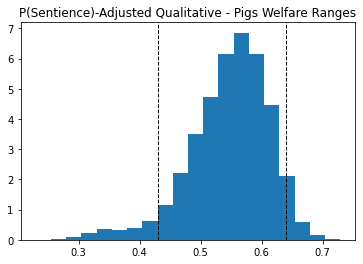

-


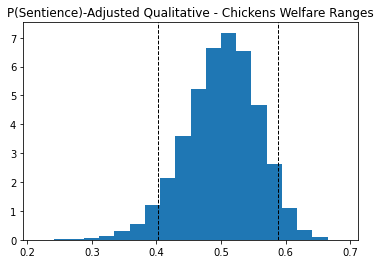

-


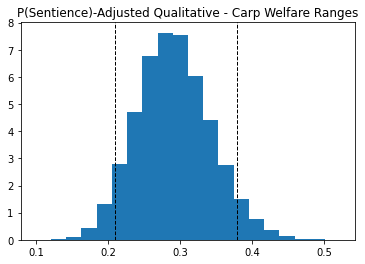

-


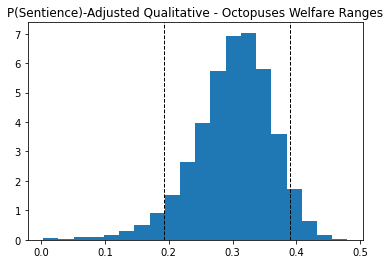

-


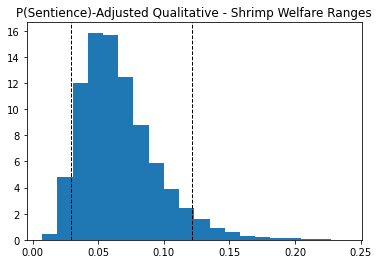

-


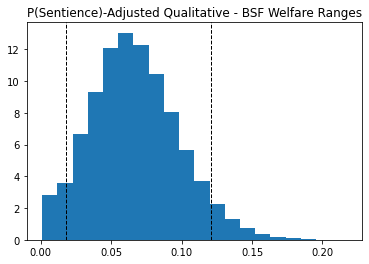

-
     Animals   Mean     5%    25%    50%    75%    95%
0       Pigs  0.547  0.430  0.513  0.556  0.586  0.641
1   Chickens  0.501  0.403  0.466  0.505  0.540  0.588
2       Carp  0.291  0.210  0.256  0.289  0.324  0.379
3  Octopuses  0.301  0.193  0.266  0.307  0.342  0.390
4     Shrimp  0.066  0.029  0.045  0.061  0.081  0.122
5        BSF  0.067  0.018  0.045  0.065  0.086  0.121


In [93]:
def sent_adj_qualitative_welfare_ranges(ANIMALS, to_print=False):
    means = []
    fifth_percentiles = []
    twenty_fifth_percentiles = []
    medians = []
    seventy_fifth_percentiles = []
    ninty_fifth_percentiles = []

    sent_adj_qual_ranges_all_animals = {}

    for animal in ANIMALS:
        conditioned_animal_welfare_ranges = pickle.load(open(os.path.join('pickled_sent_conditioned_welfare_ranges', '{}_qual_model_welfare_ranges.p'.format(animal)), 'rb'))
        animal_psent = sent_models_dict[animal]
        sent_adj_animal_welfare_ranges = conditioned_animal_welfare_ranges*animal_psent
        sent_adj_qual_ranges_all_animals[animal] =sent_adj_animal_welfare_ranges
        pickle.dump(np.array(sent_adj_animal_welfare_ranges), open(os.path.join('pickled_sent_adjusted_welfare_ranges', '{}_qual_model_welfare_ranges.p'.format(animal)), 'wb'))
        sent_adj_animal_stats = one_animal_summary_stats(animal, sent_adj_animal_welfare_ranges)
        means.append(round(sent_adj_animal_stats[0],3))
        fifth_percentiles.append(round(sent_adj_animal_stats[1],3))
        twenty_fifth_percentiles.append(round(sent_adj_animal_stats[2],3))
        medians.append(round(sent_adj_animal_stats[3],3))
        seventy_fifth_percentiles.append(round(sent_adj_animal_stats[4],3))
        ninty_fifth_percentiles.append(round(sent_adj_animal_stats[5],3))

    if to_print:
        for animal in ANIMALS:
            plot_range_distribution(animal, sent_adj_qual_ranges_all_animals[animal], "P(Sentience)-Adjusted Qualitative")

    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    sent_adj_qual_range_stats_df = pd.DataFrame(list(zip(ANIMALS, means, fifth_percentiles, twenty_fifth_percentiles, medians, seventy_fifth_percentiles, ninty_fifth_percentiles)), columns=cols)
    sent_adj_qual_range_stats_df.sort_values("50%", ascending=False)
    sent_adj_qual_range_stats_df.to_csv(os.path.join("outputs", "Qualitative Model - P_Sentience-Adjusted Welfare Ranges.csv"))
    return sent_adj_qual_range_stats_df, sent_adj_qual_ranges_all_animals

sent_adj_qual_range_stats_df, sent_adj_qual_ranges_all_animals = sent_adj_qualitative_welfare_ranges(ANIMALS, to_print=True)
print(sent_adj_qual_range_stats_df)

#### Mixture Model

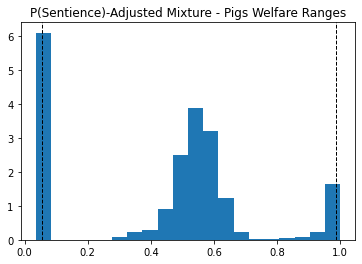

-


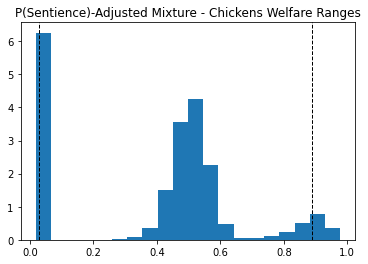

-


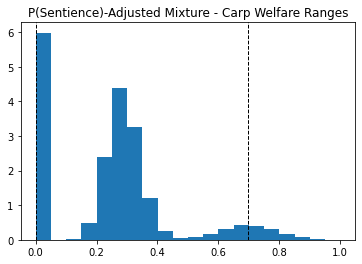

-


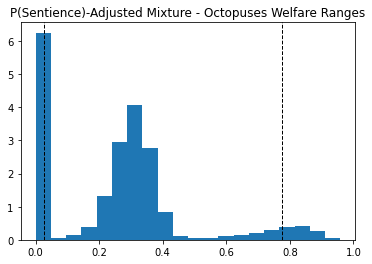

-


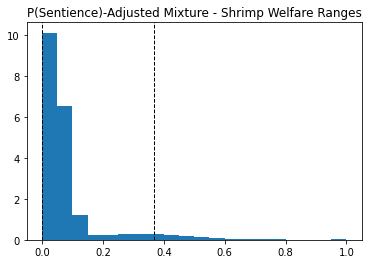

-


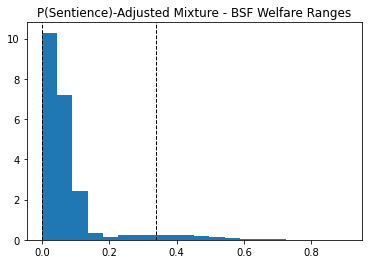

-
     Animals   Mean       5%      25%    50%    75%    95%
0       Pigs  0.441  0.05470  0.05848  0.521  0.586  0.986
1   Chickens  0.399  0.02982  0.03379  0.482  0.541  0.888
2       Carp  0.243  0.00052  0.00067  0.264  0.323  0.697
3  Octopuses  0.265  0.02712  0.03642  0.279  0.342  0.776
4     Shrimp  0.079  0.00022  0.00046  0.050  0.080  0.369
5        BSF  0.073  0.00011  0.00027  0.050  0.083  0.340


In [94]:

animal_norm_or_lognorm = {'Pigs': 'norm', 'Chickens': 'norm', 'Carp': 'norm', 'Octopuses': 'norm', 'Shrimp': 'lognorm', 'BSF': 'lognorm'}

def one_animal_sentience_adjustment(animal, animal_equality_range, animal_neuron_count_range, sent_adj_qual_animal_ranges):
    animal_psent = sent_models_dict[animal]
    sent_adj_animal_equality_ranges = animal_equality_range*animal_psent
    sent_adj_animal_neuron_count_ranges = animal_neuron_count_range*animal_psent

    sent_adj_animal_model_results = {'Qualitative': sent_adj_qual_animal_ranges,
                                      'Equality': sent_adj_animal_equality_ranges, 
                                      'Neuron Count': sent_adj_animal_neuron_count_ranges}
    
    return sent_adj_animal_model_results


def one_animal_sent_adj_mixture_results(animal, animal_equality_range, animal_neuron_count_range, animal_sent_adj_qual_ranges, weights):
    sent_adj_animal_model_results = one_animal_sentience_adjustment(animal, animal_equality_range, animal_neuron_count_range, animal_sent_adj_qual_ranges)

    animal_sent_adj_equality_results = sent_adj_animal_model_results['Equality']
    animal_sent_adj_neuron_count_results = sent_adj_animal_model_results['Neuron Count']
    animal_sent_adj_qual_results = sent_adj_animal_model_results['Qualitative']

    animal_qual_fifth_pct = np.percentile(animal_sent_adj_qual_results, 5)
    animal_qual_ninty_fifth_pct = np.percentile(animal_sent_adj_qual_results, 95)

    if animal_norm_or_lognorm[animal] == 'norm':
        qual_model = sq.norm(animal_qual_fifth_pct, animal_qual_ninty_fifth_pct, lclip=0, rclip=1)
    else:
        qual_model = sq.lognorm(animal_qual_fifth_pct, animal_qual_ninty_fifth_pct, lclip=0, rclip=1)
    equality_model = sq.uniform(animal_sent_adj_equality_results, animal_sent_adj_equality_results)
    neuron_count_model = sq.uniform(animal_sent_adj_neuron_count_results, animal_sent_adj_neuron_count_results)

    mixture_model = sq.mixture([qual_model, equality_model, neuron_count_model], weights)

    sent_adj_mixture_welfare_ranges = sq.sample(mixture_model, N)

    return sent_adj_mixture_welfare_ranges

def all_animals_sent_adj_mixture_model(to_plot=True):
    means = []
    fifth_percentiles = []
    twenty_fifth_percentiles = []
    medians = []
    seventy_fifth_percentiles = []
    ninty_fifth_percentiles = []
    
    conditioned_mixture_results = get_mixture_welfare_ranges(model_weights, to_plot=False)[1]

    sent_adj_wr_dict = {}

    for animal in ANIMALS:
        animal_conditioned_mix_wrs = conditioned_mixture_results[animal]
        animal_sentience_dist = sent_models_dict[animal]

        sent_adj_animal_mixture_wr_lst = animal_conditioned_mix_wrs*animal_sentience_dist
        sent_adj_wr_dict[animal] = sent_adj_animal_mixture_wr_lst
        
        sent_adj_animal_stats = one_animal_summary_stats(animal, sent_adj_animal_mixture_wr_lst, to_print=False)
        pickle.dump(np.array(sent_adj_animal_mixture_wr_lst), open(os.path.join('pickled_sent_adjusted_welfare_ranges', '{}_mixture_model_welfare_ranges.p'.format(animal)), 'wb'))
        means.append(round(sent_adj_animal_stats[0],3))
        fifth_percentiles.append(round(sent_adj_animal_stats[1],5))
        twenty_fifth_percentiles.append(round(sent_adj_animal_stats[2],5))
        medians.append(round(sent_adj_animal_stats[3],3))
        seventy_fifth_percentiles.append(round(sent_adj_animal_stats[4],3))
        ninty_fifth_percentiles.append(round(sent_adj_animal_stats[5],3))

    if to_plot:
        for animal in ANIMALS:
            plot_range_distribution(animal, sent_adj_wr_dict[animal], "P(Sentience)-Adjusted Mixture")
            
    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    sent_adj_mixture_welfare_range_stats_df = pd.DataFrame(list(zip(ANIMALS, means, fifth_percentiles, twenty_fifth_percentiles, medians, seventy_fifth_percentiles, ninty_fifth_percentiles)), columns=cols)
    sent_adj_mixture_welfare_range_stats_df.sort_values("50%", ascending=False)
    sent_adj_mixture_welfare_range_stats_df.to_csv(os.path.join("outputs", "Mixture Model - P_Sentience-Adjusted Welfare Ranges.csv"))
    return sent_adj_mixture_welfare_range_stats_df, sent_adj_wr_dict

print(all_animals_sent_adj_mixture_model()[0])


### Weighted Aggregation

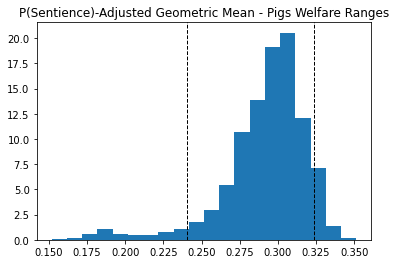

-


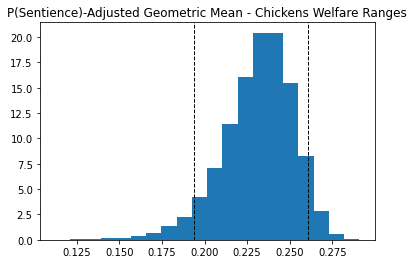

-


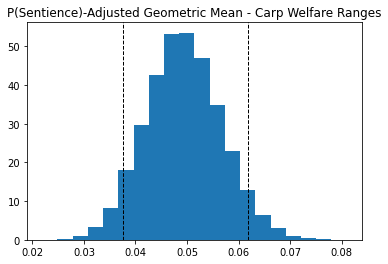

-


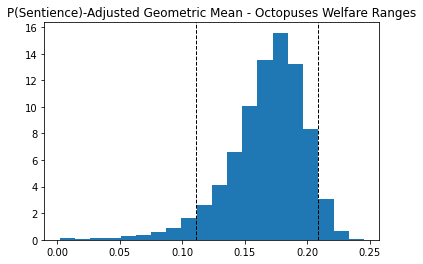

-


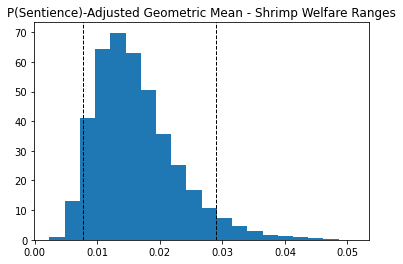

-


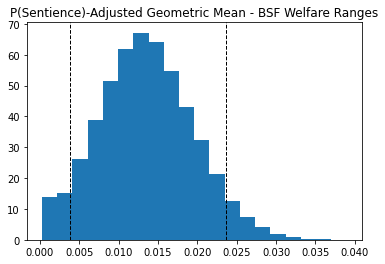

-
     Animals   Mean     5%    25%    50%    75%    95%
0       Pigs  0.292  0.240  0.281  0.296  0.309  0.324
1   Chickens  0.231  0.194  0.220  0.234  0.246  0.261
2       Carp  0.049  0.038  0.044  0.049  0.054  0.062
3  Octopuses  0.167  0.111  0.152  0.172  0.189  0.208
4     Shrimp  0.016  0.008  0.012  0.015  0.020  0.029
5        BSF  0.014  0.004  0.009  0.013  0.017  0.024


In [95]:
def all_animals_sent_adj_geometric_mean_model(model_weights, to_plot=True):
    means = []
    fifth_percentiles = []
    twenty_fifth_percentiles = []
    medians = []
    seventy_fifth_percentiles = []
    ninty_fifth_percentiles = []
    
    sent_adj_qualitative_wrs_all_animals = sent_adj_qualitative_welfare_ranges(ANIMALS)[1]
    equality_wr_lst = get_equality_welfare_ranges()
    neuron_count_wr_lst = get_neuron_count_welfare_ranges(neuron_count_aggregation_weights)

    sent_adj_geom_mean_wr_dict = {}

    for animal in ANIMALS:
        animal_sent_adj_qual_ranges = sent_adj_qualitative_wrs_all_animals[animal]
        animal_equality_range = equality_wr_lst[animal]
        animal_neuron_count_range = neuron_count_wr_lst[animal]

        animal_sent_adj_model_results = one_animal_sentience_adjustment(animal, animal_equality_range, animal_neuron_count_range, animal_sent_adj_qual_ranges)
        animal_sent_adj_equality_results = animal_sent_adj_model_results['Equality']
        animal_sent_adj_neuron_count_results = animal_sent_adj_model_results['Neuron Count']

        sent_adj_animal_geom_mean_lst = []
        for i in range(N):
            qual_result_i = animal_sent_adj_qual_ranges[i]
            equality_result_i = animal_sent_adj_equality_results[i]
            neuron_count_result_i = animal_sent_adj_neuron_count_results[i]
            geom_mean_result_i = np.exp(np.log(qual_result_i)*model_weights[0]+ np.log(equality_result_i)*model_weights[1] + np.log(neuron_count_result_i)*model_weights[2])
            sent_adj_animal_geom_mean_lst.append(geom_mean_result_i)

        sent_adj_geom_mean_wr_dict[animal] = sent_adj_animal_geom_mean_lst
        
        sent_adj_animal_stats = one_animal_summary_stats(animal, sent_adj_animal_geom_mean_lst, to_print=False)
        pickle.dump(np.array(sent_adj_animal_geom_mean_lst), open(os.path.join('pickled_sent_adjusted_welfare_ranges', '{}_geom_mean_welfare_ranges.p'.format(animal)), 'wb'))
        means.append(round(sent_adj_animal_stats[0],3))
        fifth_percentiles.append(round(sent_adj_animal_stats[1],3))
        twenty_fifth_percentiles.append(round(sent_adj_animal_stats[2],3))
        medians.append(round(sent_adj_animal_stats[3],3))
        seventy_fifth_percentiles.append(round(sent_adj_animal_stats[4],3))
        ninty_fifth_percentiles.append(round(sent_adj_animal_stats[5],3))
    
    if to_plot:
        for animal in ANIMALS:
            plot_range_distribution(animal, sent_adj_geom_mean_wr_dict[animal], "P(Sentience)-Adjusted Geometric Mean")
    
    cols = ["Animals", 'Mean', '5%', '25%', '50%', '75%', '95%']
    sent_adj_geom_mean_welfare_range_stats_df = pd.DataFrame(list(zip(ANIMALS, means, fifth_percentiles, twenty_fifth_percentiles, medians, seventy_fifth_percentiles, ninty_fifth_percentiles)), columns=cols)
    sent_adj_geom_mean_welfare_range_stats_df.sort_values("50%", ascending=False)
    sent_adj_geom_mean_welfare_range_stats_df.to_csv(os.path.join("outputs", "Geometric Mean Model - P_Sentience-Adjusted Welfare Ranges.csv"))
    return sent_adj_geom_mean_welfare_range_stats_df, sent_adj_geom_mean_wr_dict

print(all_animals_sent_adj_geometric_mean_model(model_weights)[0])